# Examining Jefferson (KY) Census Tracts' Social Vulnerability Through the Lens of the CDC Social Vulnerability Index (SVI)
Eduviges (Vicky) Kaeser

![CDC](https://www.cdc.gov/homepage/images/cdc-in-action/about-cdc.jpg)

## I.  Introduction

The Merriam-Webster Dictionary defines social and vulnerable as follows:

- so·​cial | \ ˈsō-shəl, adj: of or relating to human society, the interaction of the individual and the group, or the welfare of human beings as members of society

- vul·​ner·​a·​ble | \ ˈvəl-n(ə-)rə-bəl, adj: capable of being physically or emotionally wounded

###### Merriam-Webster.com. 2021. https://www.merriam-webster.com (21 March 2021).

The CDC SVI refers to social vulnerability as the potential negative effects on communities caused by external stresses on human health, furthermore that by reducing social vulnerability human suffering and economic losses could improve.

What is the CDC Social Vulnerability Index? The CDC SVI is a tool (to help local officials), which uses U.S. Census data (American Community Survey data) to determine the social vulnerability of every census tract. Census Tracts are subdivisions of counties for which the Census collects statistical data. The first version of the SVI was created in 2011 by ATSDR's Geospatial Research, Analysis, and Services Program. GRASP continues to create and maintain the SVI. The 2018 SVI data was released in March 2020.  

This project examines Jefferson Census Tracts' vulnerability numbers by segregating the estimates of the 15 vulnerability factors and their 4 themes, in years 2014, 2016, and 2018. Does the data indicate substantial changes during these periods? Are the changes increases or decreases? The model is performed with 2018 data utilizing X as the themes and y as the percentile rankings. A percentile ranking represents the proportion of tracts that are equal to or lower than a tract, re: social vulnerability, (i.e. an 0.85's CDC SVI ranking signals that 85% of tracts in KY are less vulnerable than the tract you are examining and that 15% of tracts  in KY are more vulnerable. After the training and test process a score of 0.86936 was achieved. Two single tracts from the Jefferson data are pulled out for further examination.



![CDC SVI](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/pdf/Documentation_Image.jpg)


Many thanks to the [Centers for Disease Control and Prevention](https://www.cdc.gov/about/default.htm)/ [Agency for Toxic Substances and Disease Registry](https://www.atsdr.cdc.gov/placeandhealth/howdoesPlaceaffectHealth.html)/ [Geospatial Research, Analysis, and Services Program](https://www.atsdr.cdc.gov/placeandhealth/about_grasp.html), for the CDC Social Vulnerability Index 2014, 2016, and 2018 Databases -- Kentucky, accessed on March 21, 2021. https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html. 


## II. Importing Data 
[CDC SVI Data Downloads](https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html)

In [238]:
#import pandas to be able to read the data frame, after downloading it from the site, click on the link above to view the original site

import pandas as pd
import numpy as np

In [239]:
#verify if you are in the correct directory

import os
os.getcwd()

'C:\\Users\\Vicky\\Downloads\\Project_KY\\Project-KY'

In [240]:
#if needed reset max and min columns and rows to reduce the quantity displayed

pd.reset_option('display.max_rows') 
pd.reset_option('display.min_rows') 
pd.reset_option('display.max_columns')

In [241]:
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.min_rows', 10)

In [242]:
#using panda to read csv plus call dtypes to get the data type for each column. Note the year, 2014. Years 2016 and 2018 will also be imported for this project. The original data 1115 rows × 127 columns

ky2014_df = pd.read_csv('../Data/Kentucky2014.csv' )
#ky2014_df
#ky2014_df.head()
ky2014_df.dtypes


FID             int64
AFFGEOID       object
TRACTCE         int64
ST              int64
STATE          object
               ...   
E_UNINSUR     float64
M_UNINSUR     float64
EP_UNINSUR    float64
MP_UNINSUR    float64
E_DAYPOP      float64
Length: 127, dtype: object

## III. Cleaning Data

In [243]:
#unique id from when it was first created

#ky2014_df['COUNTY'].unique()

In [244]:
#DataFrame, selecting Jefferson County from KY data, replaced incalculable -9.99e+02 with Nan (0 TOTPOP or unavailable value). These processes were the same for 2014, 2016, and 2018 and a count for possible later use

jeff2014_df = ky2014_df[ky2014_df['COUNTY'] == ' Jefferson']
jeff2014_df = jeff2014_df.replace( -9.99e+02, np.NaN)
jeff2014_df = jeff2014_df.dropna()
jeff2014_df.isna().sum().sum()

0

In [245]:
#to view all the rows and coluns in the data frame

#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.min_rows', 10)

In [246]:
#from jeff2014 new soc_econ2014 data frame to segregate the four factors estimates within the Socioeconomic theme and its RPL_THEME1 (percentile ranking), and the RPL_THEMES (overall ranking). New index was created. The same processes are used for all 4 theams and for years 2014, 2016, and 2018

soc_econ2014_df = jeff2014_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_POV', 'M_POV', 'EP_POV', 'MP_POV', 'EPL_POV', 'F_POV', 'E_UNEMP', 'M_UNEMP', 'EP_UNEMP', 'MP_UNEMP', 'EPL_UNEMP', 'F_UNEMP', 'E_PCI', 'M_PCI', 'EP_PCI', 'MP_PCI', 'EPL_PCI', 'F_PCI', 'E_NOHSDP', 'M_NOHSDP', 'EP_NOHSDP', 'MP_NOHSDP', 'EPL_NOHSDP', 'F_NOHSDP', 'F_THEME1', 'SPL_THEME1', 'RPL_THEME1', 'SPL_THEMES', 'RPL_THEMES' )]
soc_econ2014_df.index = range(len(soc_econ2014_df.index))
soc_econ2014_df.head()


,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_POV,M_POV,EP_POV,MP_POV,...,M_NOHSDP,EP_NOHSDP,MP_NOHSDP,EPL_NOHSDP,F_NOHSDP,F_THEME1,SPL_THEME1,RPL_THEME1,SPL_THEMES,RPL_THEMES
0,21111000200,Jefferson,"Census Tract 2, Jefferson County, Kentucky",1.135250,2792.0,386.0,1104.0,352.0,43.1,10.1,...,130.0,30.8,7.0,0.9004,1.0,4.0,3.8060,0.9901,10.5825,0.9531
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5113.0,435.0,1342.0,319.0,26.3,5.9,...,145.0,19.1,4.2,0.5844,0.0,0.0,2.9280,0.7908,10.0680,0.9134
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1640.0,251.0,750.0,266.0,46.5,11.4,...,87.0,22.3,8.4,0.6957,0.0,3.0,3.6210,0.9603,11.5115,0.9874
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2882.0,385.0,1044.0,281.0,36.2,8.0,...,152.0,20.6,7.6,0.6346,0.0,2.0,3.3656,0.9071,10.0694,0.9143
4,21111000900,Jefferson,"Census Tract 9, Jefferson County, Kentucky",0.247888,2057.0,262.0,462.0,137.0,22.5,7.5,...,89.0,16.5,5.9,0.4856,0.0,1.0,2.9329,0.7917,8.9050,0.7764


In [247]:
#sum area squaremiles and total population estimates to confirm Jefferson County numbers. The same processes are used for all 4 thems and for years 2014, 2016, and 2018
#an increase in total population between 2014 and 2016 stands at 8,239 and 7,430 by 2018 for an estimated combined increase  of 15,669 with a 10% margin of error
soc_econ2014_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.736045
E_TOTPOP     751485.000000
M_TOTPOP      67007.000000
dtype: float64

In [248]:
#finding the mean of the four factor estimates in preparation for Data Visualization later in this project. The same processes are used for all 4 theams and for years 2014, 2016, and 2018
soc_econ2014_df.loc[ : , ('E_POV', 'M_POV', 'E_UNEMP', 'M_UNEMP', 'E_PCI', 'M_PCI', 'E_NOHSDP', 'M_NOHSDP')].mean()

E_POV         648.131579
M_POV         252.400000
E_UNEMP       192.673684
M_UNEMP        94.757895
E_PCI       27589.442105
M_PCI        3651.731579
E_NOHSDP      317.352632
M_NOHSDP      117.010526
dtype: float64

In [249]:
##using panda to read csv plus call dtypes to get the data type for each column. Note the years 2014, 2016, and 2018 will be imported for this project. The original data 1115 rows × 127 columns

ky2016_df = pd.read_csv('../Data/Kentucky2016.csv' )
ky2016_df.head()
ky2016_df.dtypes

FID             int64
ST              int64
STATE          object
ST_ABBR        object
STCNTY          int64
               ...   
E_UNINSUR     float64
M_UNINSUR     float64
EP_UNINSUR    float64
MP_UNINSUR    float64
E_DAYPOP      float64
Length: 125, dtype: object

In [250]:
##unique id from when it was first created. Note the id is different for 2016 and for 2018 vs 2014 data

ky2016_df['COUNTY'].unique()
#ky2016_df.head()

array(['Boone', 'Bullitt', 'Christian', 'Jefferson', 'Lyon', 'Trigg',
       'Adair', 'Allen', 'Anderson', 'Ballard', 'Barren', 'Bath', 'Bell',
       'Bourbon', 'Boyd', 'Boyle', 'Bracken', 'Breathitt', 'Breckinridge',
       'Butler', 'Caldwell', 'Calloway', 'Campbell', 'Carlisle',
       'Carroll', 'Carter', 'Casey', 'Clark', 'Clay', 'Clinton',
       'Crittenden', 'Cumberland', 'Daviess', 'Edmonson', 'Elliott',
       'Estill', 'Fayette', 'Fleming', 'Floyd', 'Franklin', 'Fulton',
       'Gallatin', 'Garrard', 'Grant', 'Graves', 'Grayson', 'Green',
       'Greenup', 'Hancock', 'Hardin', 'Harlan', 'Harrison', 'Hart',
       'Henderson', 'Henry', 'Hickman', 'Hopkins', 'Jackson', 'Jessamine',
       'Johnson', 'Kenton', 'Knott', 'Knox', 'Larue', 'Laurel',
       'Lawrence', 'Lee', 'Leslie', 'Letcher', 'Lewis', 'Lincoln',
       'Livingston', 'Logan', 'McCracken', 'McCreary', 'McLean',
       'Madison', 'Magoffin', 'Marion', 'Marshall', 'Martin', 'Mason',
       'Meade', 'Menifee', 'Merc

In [251]:
#DataFrame, selecting Jefferson County from KY data, replaced incalculable -9.99e+02 with Nan (0 TOTPOP or unavailable value). These processes were the same for 2014, 2016, and 2018 and a count for possible later use

jeff2016_df = ky2016_df[ky2016_df['COUNTY'] == 'Jefferson']
jeff2016_df = jeff2016_df.replace( -9.99e+02, np.NaN)
jeff2016_df = jeff2016_df.dropna()
jeff2016_df.isna().sum().sum()

0

In [252]:
#from jeff(year) new soc_econ(matching year) data frame to segregate the four factors estimates within the Socioeconomic theme and its RPL_THEME(#) (theme(#) percentile ranking), and the corresponding RPL_THEMES (overall ranking). New index was created. The same processes are used for all 4 theams and for years 2014, 2016, and 2018

soc_econ2016_df = jeff2016_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_POV', 'M_POV', 'EP_POV', 'MP_POV', 'EPL_POV', 'F_POV','E_UNEMP', 'M_UNEMP', 'EP_UNEMP', 'MP_UNEMP', 'EPL_UNEMP', 'F_UNEMP', 'E_PCI', 'M_PCI', 'EP_PCI', 'MP_PCI', 'EPL_PCI', 'F_PCI', 'E_NOHSDP', 'M_NOHSDP', 'EP_NOHSDP', 'MP_NOHSDP', 'EPL_NOHSDP', 'F_NOHSDP', 'F_THEME1', 'SPL_THEME1', 'RPL_THEME1', 'SPL_THEMES', 'RPL_THEMES')]
soc_econ2016_df.index = range(len(soc_econ2016_df.index))
soc_econ2016_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_POV,M_POV,EP_POV,MP_POV,...,M_NOHSDP,EP_NOHSDP,MP_NOHSDP,EPL_NOHSDP,F_NOHSDP,F_THEME1,SPL_THEME1,RPL_THEME1,SPL_THEMES,RPL_THEMES
0,21111000300,Jefferson,"Census Tract 3, Jefferson County, Kentucky",0.649123,2371.0,451.0,847.0,278.0,35.9,11.6,...,158.0,30.7,8.4,0.9250,1.0,3.0,3.7569,0.9801,10.3190,0.9411
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5160.0,557.0,1505.0,431.0,29.3,7.1,...,126.0,15.7,3.6,0.5194,0.0,1.0,3.1172,0.8451,9.9929,0.9148
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1771.0,219.0,680.0,234.0,38.5,11.2,...,83.0,23.5,7.9,0.7742,0.0,3.0,3.6413,0.9611,11.4808,0.9873
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2685.0,355.0,992.0,310.0,36.9,9.3,...,101.0,15.3,6.0,0.4968,0.0,3.0,3.2854,0.8822,9.3210,0.8386
4,21111000800,Jefferson,"Census Tract 8, Jefferson County, Kentucky",0.585237,2310.0,296.0,416.0,160.0,18.0,6.9,...,56.0,12.2,3.7,0.3622,0.0,1.0,2.6409,0.6830,8.2820,0.6791


In [253]:
soc_econ2016_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.780608
E_TOTPOP     759724.000000
M_TOTPOP      66385.000000
dtype: float64

In [254]:
soc_econ2016_df.loc[ : , ('E_POV', 'M_POV', 'E_UNEMP', 'M_UNEMP', 'E_PCI', 'M_PCI', 'E_NOHSDP', 'M_NOHSDP')].mean()

E_POV         627.147368
M_POV         251.900000
E_UNEMP       151.363158
M_UNEMP        80.889474
E_PCI       28744.105263
M_PCI        3756.342105
E_NOHSDP      293.200000
M_NOHSDP      109.757895
dtype: float64

In [255]:
#using panda to read csv plus calling dtypes attribute to get the data type for each column. Note these codes for years 2014, 2016, and 2018 will be actively in use through out the rest of the project, without having towrite the code again. The original data 1115 rows × 127 columns

ky2018_df = pd.read_csv('../Data/Kentucky2018.csv' )
ky2018_df.head()
ky2018_df.dtypes

ST              int64
STATE          object
ST_ABBR        object
STCNTY          int64
COUNTY         object
               ...   
E_UNINSUR       int64
M_UNINSUR       int64
EP_UNINSUR    float64
MP_UNINSUR    float64
E_DAYPOP        int64
Length: 124, dtype: object

In [256]:
#unique id from when it was first created. Note the id is different for 2016 and for 2018 vs 2014 data

#ky2018_df['COUNTY'].unique()

In [257]:
#DataFrame, selecting Jefferson County from KY data, replaced incalculable -9.99e+02 with Nan (0 TOTPOP or unavailable value). These processes were the same for 2014, 2016, and 2018 and a count for possible later use

jeff2018_df = ky2018_df[ky2018_df['COUNTY'] == 'Jefferson']
jeff2018_df = jeff2018_df.replace( -9.99e+02, np.NaN)
jeff2018_df = jeff2018_df.dropna()
jeff2018_df.isna().sum().sum()
#jeff2018_df

0

In [258]:
#from jeff(year) new soc_econ(matching year) data frame to segregate the four factors estimates within the Socioeconomic theme and its RPL_THEME(#) (theme(#) percentile ranking), and the corresponding RPL_THEMES (overall ranking). New index was created. The same processes are used for all 4 theams and for years 2014, 2016, and 2018

soc_econ2018_df = jeff2018_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_POV', 'M_POV', 'EP_POV', 'MP_POV', 'EPL_POV', 'F_POV', 'E_UNEMP', 'M_UNEMP', 'EP_UNEMP', 'MP_UNEMP', 'EPL_UNEMP', 'F_UNEMP', 'E_PCI', 'M_PCI', 'EP_PCI', 'MP_PCI', 'EPL_PCI', 'F_PCI', 'E_NOHSDP', 'M_NOHSDP', 'EP_NOHSDP', 'MP_NOHSDP', 'EPL_NOHSDP', 'F_NOHSDP', 'F_THEME1', 'SPL_THEME1', 'RPL_THEME1', 'SPL_THEMES', 'RPL_THEMES')]
soc_econ2018_df.index = range(len(soc_econ2018_df.index))

soc_econ2018_df#.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_POV,M_POV,EP_POV,MP_POV,...,M_NOHSDP,EP_NOHSDP,MP_NOHSDP,EPL_NOHSDP,F_NOHSDP,F_THEME1,SPL_THEME1,RPL_THEME1,SPL_THEMES,RPL_THEMES
0,21111008500,Jefferson,"Census Tract 85, Jefferson County, Kentucky",0.288635,2063,141,164,89,7.9,4.4,...,17,0.8,1.1,0.0099,0.0,0.0,0.3109,0.0308,2.2720,0.0027
1,21111011604,Jefferson,"Census Tract 116.04, Jefferson County, Kentucky",28.807749,2434,121,88,51,3.6,2.1,...,64,5.1,3.4,0.1257,0.0,0.0,0.2586,0.0236,2.4760,0.0045
2,21111013100,Jefferson,"Census Tract 131, Jefferson County, Kentucky",0.389240,2114,92,62,23,2.9,1.1,...,9,1.0,0.6,0.0127,0.0,0.0,0.1808,0.0100,2.6407,0.0091
3,21111010317,Jefferson,"Census Tract 103.17, Jefferson County, Kentucky",2.445160,4685,191,63,36,1.3,0.8,...,31,1.4,0.9,0.0172,0.0,0.0,0.1130,0.0036,2.9959,0.0136
4,21111009800,Jefferson,"Census Tract 98, Jefferson County, Kentucky",0.647398,2602,187,97,40,3.8,1.6,...,25,2.0,1.2,0.0316,0.0,0.0,0.2503,0.0227,3.0509,0.0172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,21111002800,Jefferson,"Census Tract 28, Jefferson County, Kentucky",0.531578,2325,508,797,206,34.8,9.0,...,100,21.5,5.7,0.7441,0.0,1.0,3.4242,0.9248,11.5732,0.9918
186,21111004302,Jefferson,"Census Tract 43.02, Jefferson County, Kentucky",0.470158,1337,204,622,143,46.9,8.4,...,93,22.0,8.0,0.7604,0.0,1.0,3.3394,0.9021,11.7125,0.9937
187,21111002300,Jefferson,"Census Tract 23, Jefferson County, Kentucky",0.371553,2419,394,986,322,43.2,10.1,...,88,30.8,6.6,0.9530,1.0,3.0,3.6720,0.9674,12.0231,0.9964
188,21111003000,Jefferson,"Census Tract 30, Jefferson County, Kentucky",0.422984,3347,490,2576,462,81.0,7.8,...,148,31.6,8.3,0.9629,1.0,4.0,3.9548,1.0000,12.4082,0.9991


In [259]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.min_rows', 10)

In [260]:
soc_econ2018_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.853853
E_TOTPOP     767154.000000
M_TOTPOP      69901.000000
dtype: float64

In [261]:
soc_econ2018_df.loc[ : , ('E_POV', 'M_POV', 'E_UNEMP', 'M_UNEMP', 'E_PCI', 'M_PCI', 'E_NOHSDP', 'M_NOHSDP')].mean()

E_POV         583.721053
M_POV         241.478947
E_UNEMP       124.526316
M_UNEMP        76.163158
E_PCI       30874.126316
M_PCI        3873.842105
E_NOHSDP      278.110526
M_NOHSDP      111.310526
dtype: float64

## IV. Data Visualization

In [262]:
#notice inline was used here to work with JupyterLab, if using Jupyter Notebook try %matplotlib notebook

%matplotlib inline

In [263]:
#the backend is called

import matplotlib as mpl
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

In [264]:
import matplotlib.pyplot as plt

In [265]:
#might need to reimport numpy, if necessary

#import numpy as np

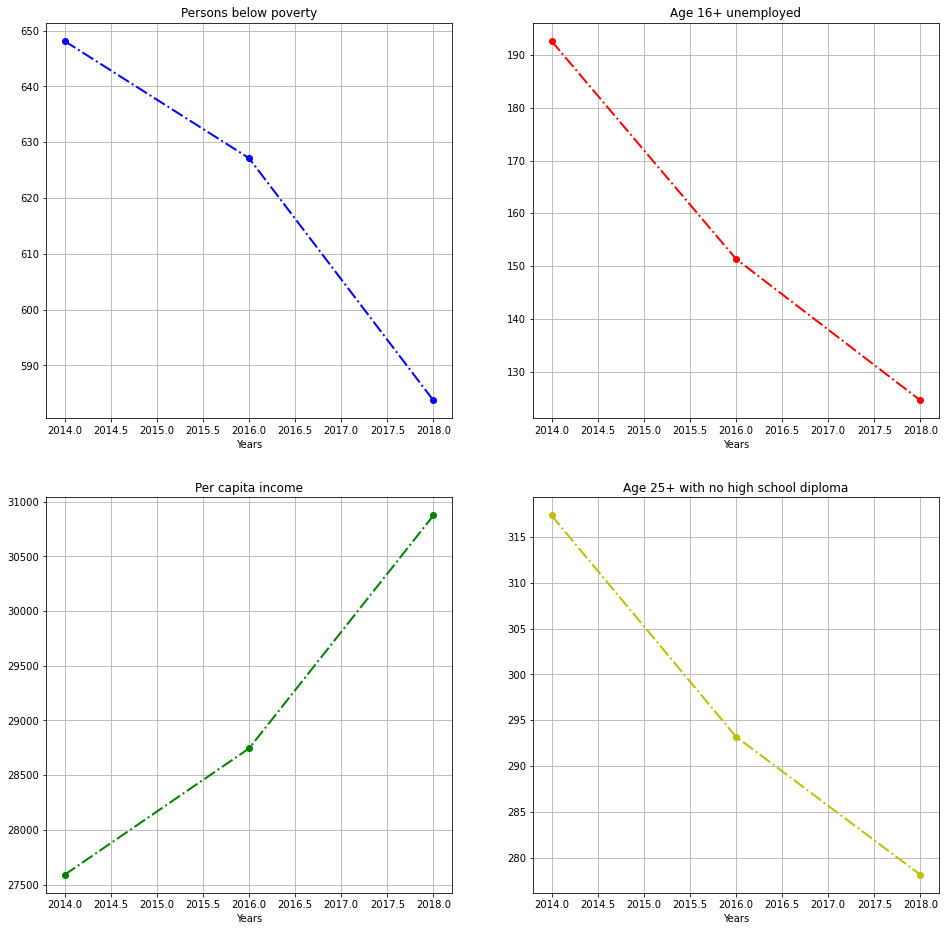

In [266]:
#code to graph the four factor estimates for theme 1 (Socialeconomic) to visualize the estimate numbers for 2014, 2016, and 2018 
#poverty, unemployment, and no high school diploma show a  consecutive drop and income shows a consecutive increase around the three years graphed

year_data = np.array([2014, 2016, 2018])

pov_data = np.array([soc_econ2014_df['E_POV'].mean(),soc_econ2016_df['E_POV'].mean(),soc_econ2018_df['E_POV'].mean()])
unemp_data = np.array([soc_econ2014_df['E_UNEMP'].mean(),soc_econ2016_df['E_UNEMP'].mean(),soc_econ2018_df['E_UNEMP'].mean()])
pcincome_data = np.array([soc_econ2014_df['E_PCI'].mean(),soc_econ2016_df['E_PCI'].mean(),soc_econ2018_df['E_PCI'].mean()])
nohsdp_data = np.array([soc_econ2014_df['E_NOHSDP'].mean(),soc_econ2016_df['E_NOHSDP'].mean(),soc_econ2018_df['E_NOHSDP'].mean()])

fig,soc_econ = plt.subplots(2,2, figsize = (16,16))
soc_econ[0][0].plot(year_data, pov_data, 'bo', lw = 2., ls = '-.' )
soc_econ[0][0].set_xlabel('Years')
soc_econ[0][0].grid(True)
soc_econ[0][0].set_title('Persons below poverty')

soc_econ[0][1].plot(year_data, unemp_data, 'ro', lw = 2., ls = '-.')
soc_econ[0][1].grid(True)
soc_econ[0][1].set_title('Age 16+ unemployed')
soc_econ[0][1].set_xlabel('Years')

soc_econ[1][0].plot(year_data, pcincome_data, 'go', lw = 2., ls = '-.')
soc_econ[1][0].grid(True)
soc_econ[1][0].set_title('Per capita income')
soc_econ[1][0].set_xlabel('Years')

soc_econ[1][1].plot(year_data, nohsdp_data, 'yo', lw = 2., ls = '-.')
soc_econ[1][1].grid(True)
soc_econ[1][1].set_title('Age 25+ with no high school diploma')
soc_econ[1][1].set_xlabel('Years')

plt.show()

In [267]:
hcompo_disabl2014_df = jeff2014_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_AGE65', 'M_AGE65', 'EP_AGE65', 'MP_AGE65', 'EPL_AGE65', 'F_AGE65', 'E_AGE17', 'M_AGE17', 'EP_AGE17', 'MP_AGE17', 'EPL_AGE17', 'F_AGE17', 'E_DISABL', 'M_DISABL', 'EP_DISABL', 'MP_DISABL', 'EPL_DISABL', 'F_DISABL', 'E_SNGPNT', 'M_SNGPNT', 'EP_SNGPNT', 'MP_SNGPNT', 'EPL_SNGPNT', 'F_SNGPNT', 'F_THEME2', 'SPL_THEME2', 'RPL_THEME2', 'SPL_THEMES', 'RPL_THEMES')]
hcompo_disabl2014_df.index = range(len(hcompo_disabl2014_df.index))
hcompo_disabl2014_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_AGE65,M_AGE65,EP_AGE65,MP_AGE65,EPL_AGE65,F_AGE65,E_AGE17,M_AGE17,EP_AGE17,MP_AGE17,EPL_AGE17,F_AGE17,E_DISABL,M_DISABL,EP_DISABL,MP_DISABL,EPL_DISABL,F_DISABL,E_SNGPNT,M_SNGPNT,EP_SNGPNT,MP_SNGPNT,EPL_SNGPNT,F_SNGPNT,F_THEME2,SPL_THEME2,RPL_THEME2,SPL_THEMES,RPL_THEMES
0,21111000200,Jefferson,"Census Tract 2, Jefferson County, Kentucky",1.135250,2792.0,386.0,243.0,64.0,8.7,2.1,0.1077,0.0,784.0,230.0,28.1,7.3,0.8779,0.0,708.0,203.0,27.6,6.9,0.9066,1.0,270.0,102.5,26.7,9.8,0.9856,1.0,2.0,2.8779,0.9524,10.5825,0.9531
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5113.0,435.0,760.0,98.0,14.9,2.0,0.5772,0.0,1246.0,256.0,24.4,4.6,0.6346,0.0,1111.0,206.0,21.7,4.1,0.7442,0.0,292.0,100.0,15.2,5.1,0.8860,0.0,0.0,2.8420,0.9336,10.0680,0.9134
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1640.0,251.0,154.0,46.0,9.4,3.0,0.1427,0.0,576.0,178.0,35.1,9.4,0.9883,1.0,368.0,109.0,22.4,5.4,0.7792,0.0,220.0,79.2,35.3,11.9,0.9982,1.0,2.0,2.9084,0.9587,11.5115,0.9874
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2882.0,385.0,236.0,35.0,8.2,1.8,0.0943,0.0,800.0,221.0,27.8,6.7,0.8618,0.0,637.0,169.0,22.1,5.3,0.7648,0.0,279.0,103.4,24.9,8.7,0.9794,1.0,1.0,2.7002,0.8815,10.0694,0.9143
4,21111000900,Jefferson,"Census Tract 9, Jefferson County, Kentucky",0.247888,2057.0,262.0,308.0,93.0,15.0,5.1,0.5907,0.0,455.0,210.0,22.1,9.8,0.4093,0.0,460.0,161.0,22.4,7.2,0.7792,0.0,128.0,46.7,14.8,5.3,0.8770,0.0,0.0,2.6562,0.8636,8.9050,0.7764


In [268]:
hcompo_disabl2014_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.736045
E_TOTPOP     751485.000000
M_TOTPOP      67007.000000
dtype: float64

In [269]:
hcompo_disabl2014_df.loc[ : , ('E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL', 'E_SNGPNT', 'M_SNGPNT')].mean()

E_AGE65     547.789474
M_AGE65      89.336842
E_AGE17     905.968421
M_AGE17     191.247368
E_DISABL    574.147368
M_DISABL    153.389474
E_SNGPNT    175.278947
M_SNGPNT     80.242632
dtype: float64

In [270]:
hcompo_disabl2016_df = jeff2016_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_AGE65', 'M_AGE65', 'EP_AGE65', 'MP_AGE65', 'EPL_AGE65', 'F_AGE65', 'E_AGE17', 'M_AGE17', 'EP_AGE17', 'MP_AGE17', 'EPL_AGE17', 'F_AGE17', 'E_DISABL', 'M_DISABL', 'EP_DISABL', 'MP_DISABL', 'EPL_DISABL', 'F_DISABL', 'E_SNGPNT', 'M_SNGPNT', 'EP_SNGPNT', 'MP_SNGPNT', 'EPL_SNGPNT', 'F_SNGPNT', 'F_THEME2', 'SPL_THEME2', 'RPL_THEME2', 'SPL_THEMES', 'RPL_THEMES')]
hcompo_disabl2016_df.index = range(len(hcompo_disabl2016_df.index))
hcompo_disabl2016_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_AGE65,M_AGE65,EP_AGE65,MP_AGE65,EPL_AGE65,F_AGE65,E_AGE17,M_AGE17,EP_AGE17,MP_AGE17,EPL_AGE17,F_AGE17,E_DISABL,M_DISABL,EP_DISABL,MP_DISABL,EPL_DISABL,F_DISABL,E_SNGPNT,M_SNGPNT,EP_SNGPNT,MP_SNGPNT,EPL_SNGPNT,F_SNGPNT,F_THEME2,SPL_THEME2,RPL_THEME2,SPL_THEMES,RPL_THEMES
0,21111000300,Jefferson,"Census Tract 3, Jefferson County, Kentucky",0.649123,2371.0,451.0,300.0,95.0,12.7,3.4,0.2852,0.0,532.0,237.0,22.4,9.0,0.4585,0.0,745.0,138.0,31.4,7.3,0.9439,1.0,105.0,59.8,11.1,6.3,0.7076,0.0,1.0,2.3952,0.7360,10.3190,0.9411
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5160.0,557.0,744.0,88.0,14.4,2.0,0.4440,0.0,1461.0,314.0,28.3,5.3,0.8953,0.0,1267.0,230.0,24.6,4.1,0.8382,0.0,427.0,124.1,22.5,6.4,0.9783,1.0,1.0,3.1558,0.9901,9.9929,0.9148
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1771.0,219.0,176.0,38.0,9.9,2.3,0.1200,0.0,604.0,149.0,34.1,7.3,0.9892,1.0,344.0,77.0,19.4,4.2,0.6221,0.0,192.0,61.0,28.3,8.5,0.9946,1.0,2.0,2.7259,0.8996,11.4808,0.9873
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2685.0,355.0,305.0,34.0,11.4,2.1,0.1859,0.0,691.0,255.0,25.7,8.9,0.7735,0.0,585.0,141.0,21.8,5.5,0.7532,0.0,248.0,94.4,22.5,8.3,0.9774,1.0,1.0,2.6900,0.8825,9.3210,0.8386
4,21111000800,Jefferson,"Census Tract 8, Jefferson County, Kentucky",0.585237,2310.0,296.0,273.0,62.0,11.8,3.0,0.2157,0.0,627.0,173.0,27.1,6.6,0.8565,0.0,308.0,90.0,13.3,4.1,0.2604,0.0,151.0,57.9,19.9,7.4,0.9639,1.0,1.0,2.2965,0.6808,8.2820,0.6791


In [271]:
hcompo_disabl2016_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.780608
E_TOTPOP     759724.000000
M_TOTPOP      66385.000000
dtype: float64

In [272]:
hcompo_disabl2016_df.loc[ : , ('E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL', 'E_SNGPNT', 'M_SNGPNT')].mean()

E_AGE65     580.157895
M_AGE65      90.105263
E_AGE17     906.994737
M_AGE17     193.642105
E_DISABL    572.768421
M_DISABL    149.300000
E_SNGPNT    169.505263
M_SNGPNT     78.958947
dtype: float64

In [273]:
hcompo_disabl2018_df = jeff2018_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_AGE65', 'M_AGE65', 'EP_AGE65', 'MP_AGE65', 'EPL_AGE65', 'F_AGE65', 'E_AGE17', 'M_AGE17', 'EP_AGE17', 'MP_AGE17', 'EPL_AGE17', 'F_AGE17', 'E_DISABL', 'M_DISABL', 'EP_DISABL', 'MP_DISABL', 'EPL_DISABL', 'F_DISABL', 'E_SNGPNT', 'M_SNGPNT', 'EP_SNGPNT', 'MP_SNGPNT', 'EPL_SNGPNT', 'F_SNGPNT', 'F_THEME2', 'SPL_THEME2', 'RPL_THEME2', 'SPL_THEMES', 'RPL_THEMES')]
hcompo_disabl2018_df.index = range(len(hcompo_disabl2018_df.index))
hcompo_disabl2018_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_AGE65,M_AGE65,EP_AGE65,MP_AGE65,EPL_AGE65,F_AGE65,E_AGE17,M_AGE17,EP_AGE17,MP_AGE17,EPL_AGE17,F_AGE17,E_DISABL,M_DISABL,EP_DISABL,MP_DISABL,EPL_DISABL,F_DISABL,E_SNGPNT,M_SNGPNT,EP_SNGPNT,MP_SNGPNT,EPL_SNGPNT,F_SNGPNT,F_THEME2,SPL_THEME2,RPL_THEME2,SPL_THEMES,RPL_THEMES
0,21111008500,Jefferson,"Census Tract 85, Jefferson County, Kentucky",0.288635,2063,141,285,59,13.8,2.8,0.3014,0.0,253,44,12.3,2.0,0.0316,0.0,132,54,6.4,2.6,0.0190,0.0,0,15,0.0,1.4,0.0000,0.0,0.0,0.3520,0.0072,2.2720,0.0027
1,21111011604,Jefferson,"Census Tract 116.04, Jefferson County, Kentucky",28.807749,2434,121,568,73,23.3,2.6,0.9468,1.0,485,63,19.9,2.4,0.2509,0.0,330,84,13.6,3.2,0.2694,0.0,4,12,0.4,1.2,0.0117,0.0,1.0,1.4788,0.1844,2.4760,0.0045
2,21111013100,Jefferson,"Census Tract 131, Jefferson County, Kentucky",0.389240,2114,92,368,28,17.4,1.2,0.6444,0.0,471,34,22.3,1.3,0.4648,0.0,167,24,7.9,1.1,0.0407,0.0,45,20,5.2,2.3,0.2464,0.0,0.0,1.3963,0.1510,2.6407,0.0091
3,21111010317,Jefferson,"Census Tract 103.17, Jefferson County, Kentucky",2.445160,4685,191,999,74,21.3,1.8,0.8908,0.0,1185,124,25.3,2.4,0.7590,0.0,310,82,6.6,1.8,0.0217,0.0,73,39,4.2,2.3,0.1652,0.0,0.0,1.8367,0.3816,2.9959,0.0136
4,21111009800,Jefferson,"Census Tract 98, Jefferson County, Kentucky",0.647398,2602,187,624,71,24.0,2.7,0.9585,1.0,422,98,16.2,3.6,0.0812,0.0,270,62,10.4,2.4,0.1221,0.0,80,41,6.2,3.2,0.3357,0.0,1.0,1.4975,0.1908,3.0509,0.0172


In [274]:
hcompo_disabl2018_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.853853
E_TOTPOP     767154.000000
M_TOTPOP      69901.000000
dtype: float64

In [275]:
hcompo_disabl2018_df.loc[ : , ('E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL', 'E_SNGPNT', 'M_SNGPNT')].mean()

E_AGE65     618.863158
M_AGE65      97.842105
E_AGE17     906.373684
M_AGE17     193.631579
E_DISABL    566.584211
M_DISABL    154.210526
E_SNGPNT    160.821053
M_SNGPNT     76.710526
dtype: float64

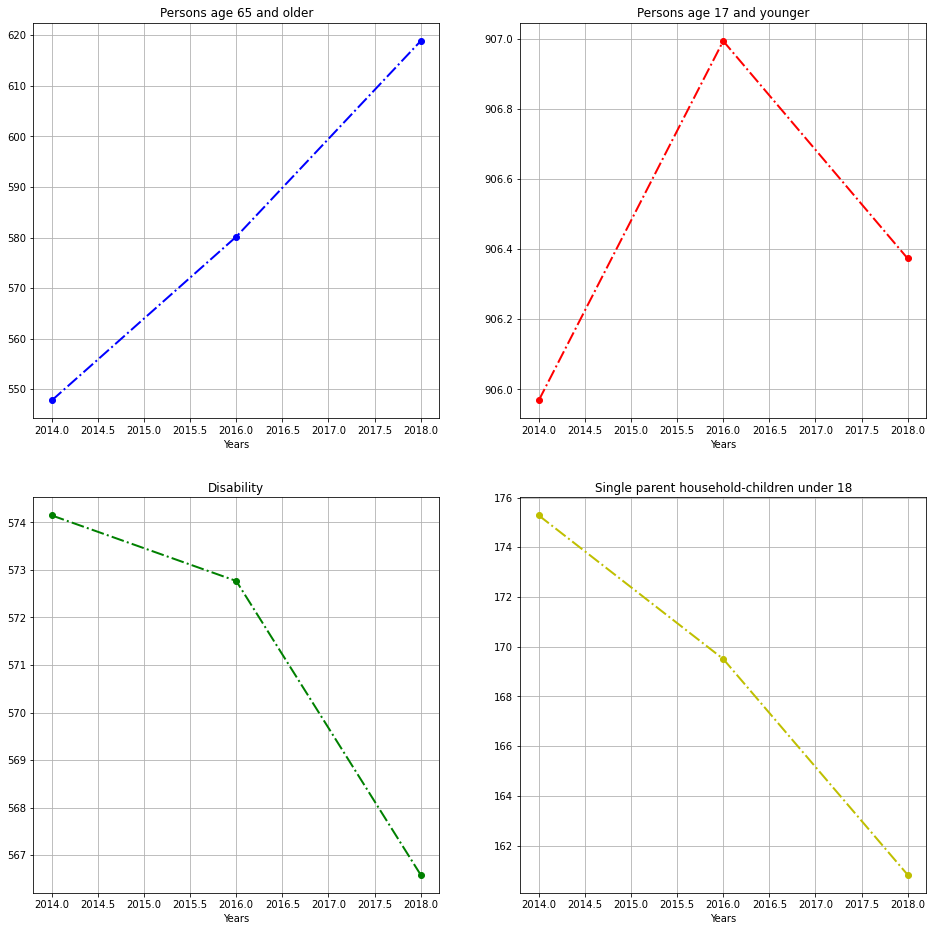

In [276]:
#code to graph the four factor estimates for theme 2 (Household Composition & Disability) to visualize the estimate numbers for 2014, 2016, and 2018 
#single-parent households and age 5+ with disability show drop, age 65+ shows increase, and age 17 and younger shows an up and a down, but not significant

year_data = np.array([2014, 2016, 2018])

age65_data = np.array([hcompo_disabl2014_df['E_AGE65'].mean(),hcompo_disabl2016_df['E_AGE65'].mean(),hcompo_disabl2018_df['E_AGE65'].mean()])
age17_data = np.array([hcompo_disabl2014_df['E_AGE17'].mean(),hcompo_disabl2016_df['E_AGE17'].mean(),hcompo_disabl2018_df['E_AGE17'].mean()])
disabl_data = np.array([hcompo_disabl2014_df['E_DISABL'].mean(),hcompo_disabl2016_df['E_DISABL'].mean(),hcompo_disabl2018_df['E_DISABL'].mean()])
sngpnt_data = np.array([hcompo_disabl2014_df['E_SNGPNT'].mean(),hcompo_disabl2016_df['E_SNGPNT'].mean(),hcompo_disabl2018_df['E_SNGPNT'].mean()])

fig,hcompo_disabl = plt.subplots(2,2, figsize = (16,16))
hcompo_disabl[0][0].plot(year_data, age65_data, 'bo', lw = 2., ls = '-.')
hcompo_disabl[0][0].set_xlabel('Years')
hcompo_disabl[0][0].grid(True)
hcompo_disabl[0][0].set_title('Persons age 65 and older')
hcompo_disabl[0][1].plot(year_data, age17_data, 'ro', lw = 2., ls = '-.')
hcompo_disabl[0][1].grid(True)
hcompo_disabl[0][1].set_title('Persons age 17 and younger')
hcompo_disabl[0][1].set_xlabel('Years')
hcompo_disabl[1][0].plot(year_data, disabl_data, 'go', lw = 2., ls = '-.')
hcompo_disabl[1][0].grid(True)
hcompo_disabl[1][0].set_title('Disability')
hcompo_disabl[1][0].set_xlabel('Years')
hcompo_disabl[1][1].plot(year_data, sngpnt_data, 'yo', lw = 2., ls = '-.')
hcompo_disabl[1][1].grid(True)
hcompo_disabl[1][1].set_title('Single parent household-children under 18')
hcompo_disabl[1][1].set_xlabel('Years')
plt.show()

In [277]:
minrty_lang2014_df =jeff2014_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MINRTY', 'M_MINRTY', 'EP_MINRTY', 'MP_MINRTY', 'EPL_MINRTY', 'F_MINRTY', 'E_LIMENG', 'M_LIMENG', 'EP_LIMENG', 'MP_LIMENG', 'EPL_LIMENG', 'F_LIMENG', 'F_THEME3', 'SPL_THEME3', 'RPL_THEME3', 'SPL_THEMES', 'RPL_THEMES')]
minrty_lang2014_df.index = range(len(minrty_lang2014_df.index))
minrty_lang2014_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MINRTY,M_MINRTY,EP_MINRTY,MP_MINRTY,EPL_MINRTY,F_MINRTY,E_LIMENG,M_LIMENG,EP_LIMENG,MP_LIMENG,EPL_LIMENG,F_LIMENG,F_THEME3,SPL_THEME3,RPL_THEME3,SPL_THEMES,RPL_THEMES
0,21111000200,Jefferson,"Census Tract 2, Jefferson County, Kentucky",1.135250,2792.0,386.0,611.0,505.2,21.9,17.8,0.8016,0.0,4.0,43.2,0.2,1.7,0.4506,0.0,0.0,1.2522,0.6661,10.5825,0.9531
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5113.0,435.0,3960.0,506.8,77.4,7.4,0.9794,1.0,9.0,45.2,0.2,0.9,0.4605,0.0,1.0,1.4399,0.7639,10.0680,0.9134
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1640.0,251.0,1598.0,253.6,97.4,4.1,0.9964,1.0,8.0,44.3,0.5,3.0,0.6167,0.0,1.0,1.6131,0.8528,11.5115,0.9874
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2882.0,385.0,2490.0,487.5,86.4,12.4,0.9865,1.0,0.0,44.0,0.0,1.6,0.0000,0.0,1.0,0.9865,0.5368,10.0694,0.9143
4,21111000900,Jefferson,"Census Tract 9, Jefferson County, Kentucky",0.247888,2057.0,262.0,2023.0,263.8,98.3,2.8,0.9973,1.0,0.0,44.0,0.0,2.3,0.0000,0.0,1.0,0.9973,0.5458,8.9050,0.7764


In [278]:
minrty_lang2014_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.736045
E_TOTPOP     751485.000000
M_TOTPOP      67007.000000
dtype: float64

In [279]:
minrty_lang2014_df.loc[ : , ('E_MINRTY', 'M_MINRTY', 'E_LIMENG', 'M_LIMENG')].mean()

E_MINRTY    1190.615789
M_MINRTY     471.278421
E_LIMENG      75.436842
M_LIMENG      82.244211
dtype: float64

In [280]:
minrty_lang2016_df = jeff2014_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MINRTY', 'M_MINRTY', 'EP_MINRTY', 'MP_MINRTY', 'EPL_MINRTY', 'F_MINRTY', 'E_LIMENG', 'M_LIMENG', 'EP_LIMENG', 'MP_LIMENG', 'EPL_LIMENG', 'F_LIMENG', 'F_THEME3', 'SPL_THEME3', 'RPL_THEME3', 'SPL_THEMES', 'RPL_THEMES')]
minrty_lang2016_df.index = range(len(minrty_lang2016_df.index))
minrty_lang2016_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MINRTY,M_MINRTY,EP_MINRTY,MP_MINRTY,EPL_MINRTY,F_MINRTY,E_LIMENG,M_LIMENG,EP_LIMENG,MP_LIMENG,EPL_LIMENG,F_LIMENG,F_THEME3,SPL_THEME3,RPL_THEME3,SPL_THEMES,RPL_THEMES
0,21111000200,Jefferson,"Census Tract 2, Jefferson County, Kentucky",1.135250,2792.0,386.0,611.0,505.2,21.9,17.8,0.8016,0.0,4.0,43.2,0.2,1.7,0.4506,0.0,0.0,1.2522,0.6661,10.5825,0.9531
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5113.0,435.0,3960.0,506.8,77.4,7.4,0.9794,1.0,9.0,45.2,0.2,0.9,0.4605,0.0,1.0,1.4399,0.7639,10.0680,0.9134
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1640.0,251.0,1598.0,253.6,97.4,4.1,0.9964,1.0,8.0,44.3,0.5,3.0,0.6167,0.0,1.0,1.6131,0.8528,11.5115,0.9874
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2882.0,385.0,2490.0,487.5,86.4,12.4,0.9865,1.0,0.0,44.0,0.0,1.6,0.0000,0.0,1.0,0.9865,0.5368,10.0694,0.9143
4,21111000900,Jefferson,"Census Tract 9, Jefferson County, Kentucky",0.247888,2057.0,262.0,2023.0,263.8,98.3,2.8,0.9973,1.0,0.0,44.0,0.0,2.3,0.0000,0.0,1.0,0.9973,0.5458,8.9050,0.7764


In [281]:
minrty_lang2016_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.736045
E_TOTPOP     751485.000000
M_TOTPOP      67007.000000
dtype: float64

In [282]:
minrty_lang2016_df.loc[ : , ('E_MINRTY', 'M_MINRTY', 'E_LIMENG', 'M_LIMENG')].mean()

E_MINRTY    1190.615789
M_MINRTY     471.278421
E_LIMENG      75.436842
M_LIMENG      82.244211
dtype: float64

In [283]:
minrty_lang2018_df = jeff2018_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MINRTY', 'M_MINRTY', 'EP_MINRTY', 'MP_MINRTY', 'EPL_MINRTY', 'F_MINRTY', 'E_LIMENG', 'M_LIMENG', 'EP_LIMENG', 'MP_LIMENG', 'EPL_LIMENG', 'F_LIMENG', 'F_THEME3', 'SPL_THEME3', 'RPL_THEME3', 'SPL_THEMES', 'RPL_THEMES')]
minrty_lang2018_df.index = range(len(minrty_lang2018_df.index))
minrty_lang2018_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MINRTY,M_MINRTY,EP_MINRTY,MP_MINRTY,EPL_MINRTY,F_MINRTY,E_LIMENG,M_LIMENG,EP_LIMENG,MP_LIMENG,EPL_LIMENG,F_LIMENG,F_THEME3,SPL_THEME3,RPL_THEME3,SPL_THEMES,RPL_THEMES
0,21111008500,Jefferson,"Census Tract 85, Jefferson County, Kentucky",0.288635,2063,141,122,198,5.9,9.6,0.3619,0.0,0,44,0.0,2.2,0.0000,0.0,0.0,0.3619,0.2500,2.2720,0.0027
1,21111011604,Jefferson,"Census Tract 116.04, Jefferson County, Kentucky",28.807749,2434,121,62,169,2.5,6.9,0.1453,0.0,0,44,0.0,1.9,0.0000,0.0,0.0,0.1453,0.1182,2.4760,0.0045
2,21111013100,Jefferson,"Census Tract 131, Jefferson County, Kentucky",0.389240,2114,92,77,131,3.6,6.2,0.2157,0.0,4,42,0.2,2.1,0.4801,0.0,0.0,0.6958,0.4251,2.6407,0.0091
3,21111010317,Jefferson,"Census Tract 103.17, Jefferson County, Kentucky",2.445160,4685,191,414,301,8.8,6.4,0.4973,0.0,8,44,0.2,1.0,0.4801,0.0,0.0,0.9774,0.5569,2.9959,0.0136
4,21111009800,Jefferson,"Census Tract 98, Jefferson County, Kentucky",0.647398,2602,187,68,266,2.6,10.2,0.1498,0.0,0,44,0.0,1.8,0.0000,0.0,0.0,0.1498,0.1200,3.0509,0.0172


In [284]:
minrty_lang2018_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.853853
E_TOTPOP     767154.000000
M_TOTPOP      69901.000000
dtype: float64

In [285]:
minrty_lang2018_df.loc[ : , ('E_MINRTY', 'M_MINRTY', 'E_LIMENG', 'M_LIMENG')].mean()

E_MINRTY    1294.826316
M_MINRTY     487.200000
E_LIMENG      79.231579
M_LIMENG      82.642105
dtype: float64

[1190.61578947 1190.61578947 1294.82631579]
[75.43684211 75.43684211 79.23157895]


Text(0.5, 0, 'Years')

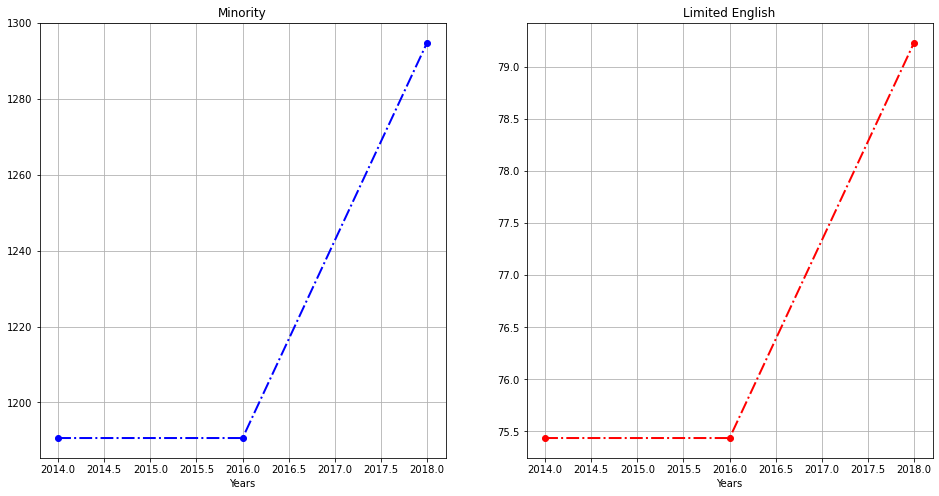

In [286]:
#code to graph the two factor estimates for theme 3 (Minority Status & Language) to visualize the estimate numbers for 2014, 2016, and 2018 
#minority and limited English language show equal numbers between 2014 and 2016, but a high increase for 2018

year_data = np.array([2014, 2016, 2018])

minority_data = np.array([minrty_lang2014_df['E_MINRTY'].mean(),minrty_lang2016_df['E_MINRTY'].mean(),minrty_lang2018_df['E_MINRTY'].mean()])
limitedenglish_data = np.array([minrty_lang2014_df['E_LIMENG'].mean(),minrty_lang2016_df['E_LIMENG'].mean(),minrty_lang2018_df['E_LIMENG'].mean()])
print(str(minority_data))
print(str(limitedenglish_data))

fig,(minority, limeng) = plt.subplots(1,2, figsize = (16,8,))

minority.plot(year_data, minority_data, 'bo', lw = 2., ls = '-.')
minority.grid(True)
minority.set_xlabel('Years')
minority.set_title('Minority')

limeng.plot(year_data, limitedenglish_data, 'ro', lw = 2., ls = '-.')
limeng.grid(True)
plt.title('Limited English')    
plt.xlabel('Years')

In [287]:
transp_htype2014_df = jeff2014_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MUNIT', 'M_MUNIT', 'EP_MUNIT', 'MP_MUNIT', 'EPL_MUNIT', 'F_MUNIT', 'E_MOBILE', 'M_MOBILE', 'EP_MOBILE', 'MP_MOBILE', 'EPL_MOBILE', 'F_MOBILE', 'E_CROWD', 'M_CROWD', 'EP_CROWD', 'MP_CROWD', 'EPL_CROWD', 'F_CROWD', 'E_NOVEH', 'M_NOVEH', 'EP_NOVEH', 'MP_NOVEH', 'EPL_NOVEH', 'F_NOVEH', 'E_GROUPQ', 'M_GROUPQ', 'EP_GROUPQ', 'MP_GROUPQ', 'EPL_GROUPQ', 'F_GROUPQ', 'F_THEME4', 'SPL_THEME4', 'RPL_THEME4', 'SPL_THEMES', 'RPL_THEMES')]
transp_htype2014_df.index = range(len(transp_htype2014_df.index))
transp_htype2014_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MUNIT,M_MUNIT,EP_MUNIT,MP_MUNIT,EPL_MUNIT,F_MUNIT,E_MOBILE,M_MOBILE,EP_MOBILE,MP_MOBILE,EPL_MOBILE,F_MOBILE,E_CROWD,M_CROWD,EP_CROWD,MP_CROWD,EPL_CROWD,F_CROWD,E_NOVEH,M_NOVEH,EP_NOVEH,MP_NOVEH,EPL_NOVEH,F_NOVEH,E_GROUPQ,M_GROUPQ,EP_GROUPQ,MP_GROUPQ,EPL_GROUPQ,F_GROUPQ,F_THEME4,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES
0,21111000200,Jefferson,"Census Tract 2, Jefferson County, Kentucky",1.135250,2792.0,386.0,11.0,19.4,0.8,1.5,0.4327,0.0,0.0,11.0,0.0,2.2,0.0,0.0,7.0,15.6,0.7,1.5,0.3142,0.0,298.0,90.0,29.5,7.7,0.9713,1.0,235.0,82.0,8.4,2.7,0.9282,1.0,2.0,2.6463,0.6320,10.5825,0.9531
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5113.0,435.0,153.0,53.3,7.1,2.5,0.7567,0.0,0.0,16.0,0.0,1.4,0.0,0.0,45.0,42.2,2.3,2.2,0.6984,0.0,336.0,95.0,17.5,4.6,0.9048,1.0,5.0,9.0,0.1,0.2,0.4982,0.0,1.0,2.8582,0.7181,10.0680,0.9134
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1640.0,251.0,110.0,51.4,11.8,5.5,0.8303,0.0,0.0,11.0,0.0,3.2,0.0,0.0,36.0,31.0,5.8,4.9,0.9551,1.0,217.0,67.0,34.8,8.9,0.9838,1.0,9.0,5.0,0.5,0.3,0.5996,0.0,2.0,3.3689,0.8914,11.5115,0.9874
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2882.0,385.0,116.0,68.0,8.4,4.9,0.7864,0.0,0.0,11.0,0.0,2.1,0.0,0.0,33.0,33.6,2.9,3.0,0.7873,0.0,301.0,117.0,26.9,9.8,0.9650,1.0,2.0,4.0,0.1,0.1,0.4785,0.0,1.0,3.0171,0.7711,10.0694,0.9143
4,21111000900,Jefferson,"Census Tract 9, Jefferson County, Kentucky",0.247888,2057.0,262.0,47.0,27.3,4.6,2.7,0.6786,0.0,0.0,11.0,0.0,2.9,0.0,0.0,19.0,31.0,2.2,3.6,0.6715,0.0,242.0,74.0,28.0,7.8,0.9686,1.0,0.0,11.0,0.0,0.5,0.0000,0.0,1.0,2.3187,0.4776,8.9050,0.7764


In [288]:
transp_htype2014_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.736045
E_TOTPOP     751485.000000
M_TOTPOP      67007.000000
dtype: float64

In [289]:
transp_htype2014_df.loc[ : , ('E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE', 'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ')].mean()

E_MUNIT     225.157895
M_MUNIT      78.574211
E_MOBILE     25.636842
M_MOBILE     21.894737
E_CROWD      24.284211
M_CROWD      30.117895
E_NOVEH     162.531579
M_NOVEH      66.831579
E_GROUPQ     80.636842
M_GROUPQ     48.636842
dtype: float64

In [290]:
transp_htype2016_df = jeff2016_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MUNIT', 'M_MUNIT', 'EP_MUNIT', 'MP_MUNIT', 'EPL_MUNIT', 'F_MUNIT', 'E_MOBILE', 'M_MOBILE', 'EP_MOBILE', 'MP_MOBILE', 'EPL_MOBILE', 'F_MOBILE', 'E_CROWD', 'M_CROWD', 'EP_CROWD', 'MP_CROWD', 'EPL_CROWD', 'F_CROWD', 'E_NOVEH', 'M_NOVEH', 'EP_NOVEH', 'MP_NOVEH', 'EPL_NOVEH', 'F_NOVEH', 'E_GROUPQ', 'M_GROUPQ', 'EP_GROUPQ', 'MP_GROUPQ', 'EPL_GROUPQ', 'F_GROUPQ', 'F_THEME4', 'SPL_THEME4', 'RPL_THEME4', 'SPL_THEMES', 'RPL_THEMES')]
transp_htype2016_df.index = range(len(transp_htype2016_df.index))
transp_htype2016_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MUNIT,M_MUNIT,EP_MUNIT,MP_MUNIT,EPL_MUNIT,F_MUNIT,E_MOBILE,M_MOBILE,EP_MOBILE,MP_MOBILE,EPL_MOBILE,F_MOBILE,E_CROWD,M_CROWD,EP_CROWD,MP_CROWD,EPL_CROWD,F_CROWD,E_NOVEH,M_NOVEH,EP_NOVEH,MP_NOVEH,EPL_NOVEH,F_NOVEH,E_GROUPQ,M_GROUPQ,EP_GROUPQ,MP_GROUPQ,EPL_GROUPQ,F_GROUPQ,F_THEME4,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES
0,21111000300,Jefferson,"Census Tract 3, Jefferson County, Kentucky",0.649123,2371.0,451.0,19.0,24.6,1.6,2.1,0.5036,0.0,8.0,13.0,0.7,1.1,0.2817,0.0,47.0,54.1,5.0,5.7,0.9350,1.0,235.0,100.0,24.9,10.7,0.9583,1.0,0.0,11.0,0.0,0.5,0.0000,0.0,2.0,2.6787,0.6766,10.3190,0.9411
1,21111000400,Jefferson,"Census Tract 4, Jefferson County, Kentucky",1.108256,5160.0,557.0,133.0,57.3,6.2,2.7,0.7256,0.0,7.0,11.0,0.3,0.5,0.2219,0.0,78.0,72.8,4.1,3.8,0.8755,0.0,354.0,96.0,18.7,4.7,0.9121,1.0,0.0,16.0,0.0,0.3,0.0000,0.0,1.0,2.7351,0.6938,9.9929,0.9148
2,21111000600,Jefferson,"Census Tract 6, Jefferson County, Kentucky",0.457008,1771.0,219.0,98.0,33.6,10.6,3.6,0.8168,0.0,0.0,11.0,0.0,3.2,0.0000,0.0,45.0,24.7,6.6,3.6,0.9720,1.0,228.0,67.0,33.6,8.8,0.9792,1.0,11.0,5.0,0.6,0.3,0.6146,0.0,2.0,3.3826,0.8967,11.4808,0.9873
3,21111000700,Jefferson,"Census Tract 7, Jefferson County, Kentucky",0.351949,2685.0,355.0,122.0,70.0,8.9,5.1,0.7897,0.0,0.0,11.0,0.0,2.2,0.0000,0.0,21.0,28.3,1.9,2.6,0.5830,0.0,389.0,112.0,35.3,9.3,0.9846,1.0,0.0,11.0,0.0,0.4,0.0000,0.0,1.0,2.3573,0.5326,9.3210,0.8386
4,21111000800,Jefferson,"Census Tract 8, Jefferson County, Kentucky",0.585237,2310.0,296.0,48.0,44.8,5.2,4.8,0.6859,0.0,0.0,11.0,0.0,3.2,0.0000,0.0,20.0,26.4,2.6,3.5,0.7202,0.0,158.0,54.0,20.8,6.8,0.9402,1.0,0.0,11.0,0.0,0.5,0.0000,0.0,1.0,2.3464,0.5272,8.2820,0.6791


In [291]:
transp_htype2016_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.780608
E_TOTPOP     759724.000000
M_TOTPOP      66385.000000
dtype: float64

In [292]:
transp_htype2016_df.loc[ : , ('E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE', 'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ')].mean()

E_MUNIT     224.610526
M_MUNIT      77.095789
E_MOBILE     24.784211
M_MOBILE     20.452632
E_CROWD      28.584211
M_CROWD      33.904211
E_NOVEH     163.247368
M_NOVEH      65.063158
E_GROUPQ     82.442105
M_GROUPQ     43.163158
dtype: float64

In [293]:
transp_htype2018_df = jeff2018_df.loc[ : , ('FIPS', 'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_MUNIT', 'M_MUNIT', 'EP_MUNIT', 'MP_MUNIT', 'EPL_MUNIT', 'F_MUNIT', 'E_MOBILE', 'M_MOBILE', 'EP_MOBILE', 'MP_MOBILE', 'EPL_MOBILE', 'F_MOBILE', 'E_CROWD', 'M_CROWD', 'EP_CROWD', 'MP_CROWD', 'EPL_CROWD', 'F_CROWD', 'E_NOVEH', 'M_NOVEH', 'EP_NOVEH', 'MP_NOVEH', 'EPL_NOVEH', 'F_NOVEH', 'E_GROUPQ', 'M_GROUPQ', 'EP_GROUPQ', 'MP_GROUPQ', 'EPL_GROUPQ', 'F_GROUPQ', 'F_THEME4', 'SPL_THEME4', 'RPL_THEME4', 'SPL_THEMES', 'RPL_THEMES')]
transp_htype2018_df.index = range(len(transp_htype2018_df.index))
transp_htype2018_df.head()

,FIPS,COUNTY,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_MUNIT,M_MUNIT,EP_MUNIT,MP_MUNIT,EPL_MUNIT,F_MUNIT,E_MOBILE,M_MOBILE,EP_MOBILE,MP_MOBILE,EPL_MOBILE,F_MOBILE,E_CROWD,M_CROWD,EP_CROWD,MP_CROWD,EPL_CROWD,F_CROWD,E_NOVEH,M_NOVEH,EP_NOVEH,MP_NOVEH,EPL_NOVEH,F_NOVEH,E_GROUPQ,M_GROUPQ,EP_GROUPQ,MP_GROUPQ,EPL_GROUPQ,F_GROUPQ,F_THEME4,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES
0,21111008500,Jefferson,"Census Tract 85, Jefferson County, Kentucky",0.288635,2063,141,92,41,8.3,3.7,0.7816,0.0,0,11,0.0,2.7,0.0000,0.0,0,15,0.0,1.4,0.0000,0.0,60,37,5.5,3.4,0.4656,0.0,0,11,0.0,0.5,0.0,0.0,0.0,1.2472,0.1123,2.2720,0.0027
1,21111011604,Jefferson,"Census Tract 116.04, Jefferson County, Kentucky",28.807749,2434,121,0,15,0.0,1.5,0.0000,0.0,15,18,1.5,1.8,0.3451,0.0,0,15,0.0,1.6,0.0000,0.0,31,24,3.1,2.4,0.2482,0.0,0,11,0.0,0.5,0.0,0.0,0.0,0.5933,0.0226,2.4760,0.0045
2,21111013100,Jefferson,"Census Tract 131, Jefferson County, Kentucky",0.389240,2114,92,0,15,0.0,1.7,0.0000,0.0,4,6,0.4,0.7,0.2346,0.0,0,15,0.0,1.8,0.0000,0.0,15,8,1.7,0.9,0.1332,0.0,0,11,0.0,0.5,0.0,0.0,0.0,0.3678,0.0118,2.6407,0.0091
3,21111010317,Jefferson,"Census Tract 103.17, Jefferson County, Kentucky",2.445160,4685,191,0,15,0.0,0.9,0.0000,0.0,0,11,0.0,1.7,0.0000,0.0,0,15,0.0,0.9,0.0000,0.0,17,17,1.0,1.0,0.0688,0.0,0,11,0.0,0.2,0.0,0.0,0.0,0.0688,0.0018,2.9959,0.0136
4,21111009800,Jefferson,"Census Tract 98, Jefferson County, Kentucky",0.647398,2602,187,89,34,6.3,2.5,0.7247,0.0,0,11,0.0,2.1,0.0000,0.0,5,14,0.4,1.1,0.2058,0.0,36,19,2.8,1.4,0.2228,0.0,0,11,0.0,0.4,0.0,0.0,0.0,1.1533,0.0987,3.0509,0.0172


In [294]:
transp_htype2018_df.loc[ : , ('AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP')].sum()

AREA_SQMI       373.853853
E_TOTPOP     767154.000000
M_TOTPOP      69901.000000
dtype: float64

In [295]:
transp_htype2018_df.loc[ : , ('E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE', 'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ')].mean()

E_MUNIT     225.510526
M_MUNIT      78.831579
E_MOBILE     24.489474
M_MOBILE     22.536842
E_CROWD      32.094737
M_CROWD      36.131579
E_NOVEH     157.157895
M_NOVEH      66.705263
E_GROUPQ     85.247368
M_GROUPQ     49.073684
dtype: float64

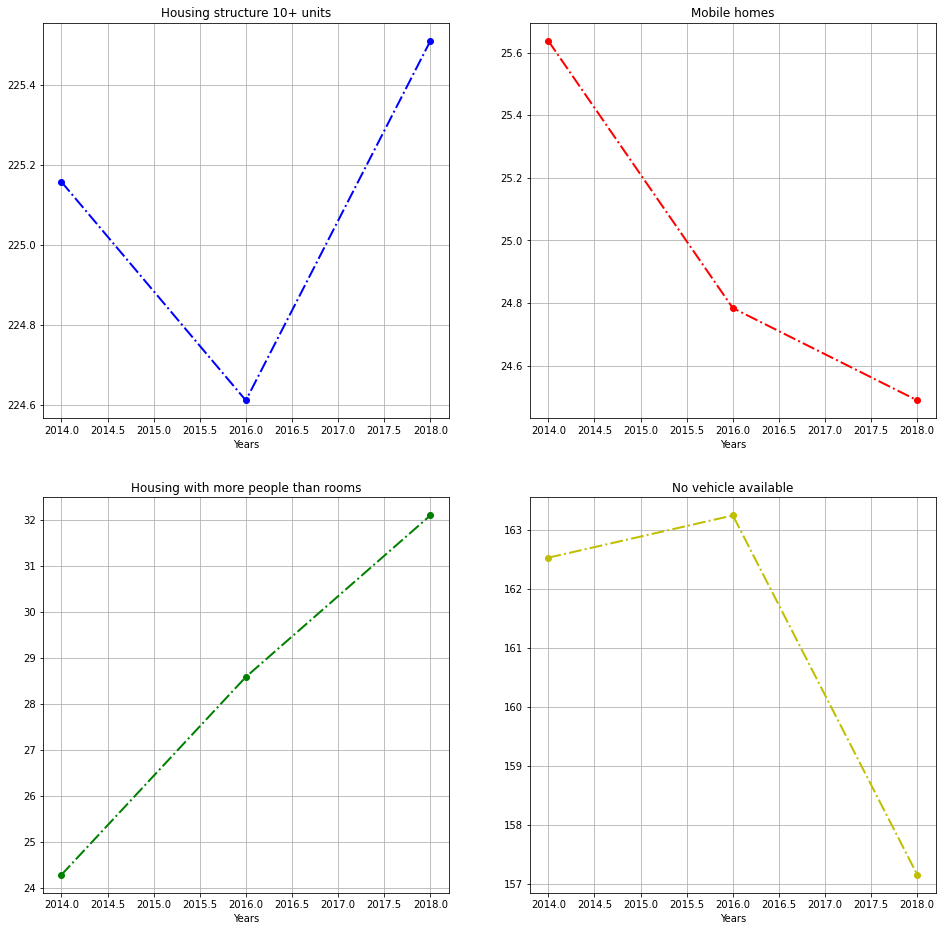

In [296]:
#code to graph the five factoctor estimates for theme 4 (Housing Type & Transportation) to visualize the estimate numbers for 2014, 2016, and 2018 
#note group quarters visual appears below the four graphs
#no vehicle and mobile homes show decline and the other factors increased around the three years graphed

year_data = np.array([2014, 2016, 2018])

multiunit_data = np.array([transp_htype2014_df['E_MUNIT'].mean(),transp_htype2016_df['E_MUNIT'].mean(),transp_htype2018_df['E_MUNIT'].mean()])
mobilehome_data = np.array([transp_htype2014_df['E_MOBILE'].mean(),transp_htype2016_df['E_MOBILE'].mean(),transp_htype2018_df['E_MOBILE'].mean()])
crowdrooms_data = np.array([transp_htype2014_df['E_CROWD'].mean(),transp_htype2016_df['E_CROWD'].mean(),transp_htype2018_df['E_CROWD'].mean()])
novehicle_data = np.array([transp_htype2014_df['E_NOVEH'].mean(),transp_htype2016_df['E_NOVEH'].mean(),transp_htype2018_df['E_NOVEH'].mean()])

fig,transp_htype = plt.subplots(2,2, figsize = (16,16))
transp_htype[0][0].plot(year_data, multiunit_data, 'bo', lw = 2., ls = '-.')
transp_htype[0][0].set_xlabel('Years')
transp_htype[0][0].grid(True)
transp_htype[0][0].set_title('Housing structure 10+ units')
transp_htype[0][1].plot(year_data, mobilehome_data, 'ro', lw = 2., ls = '-.')
transp_htype[0][1].grid(True)
transp_htype[0][1].set_title('Mobile homes')
transp_htype[0][1].set_xlabel('Years')
transp_htype[1][0].plot(year_data, crowdrooms_data, 'go', lw = 2., ls = '-.')
transp_htype[1][0].grid(True)
transp_htype[1][0].set_title('Housing with more people than rooms')
transp_htype[1][0].set_xlabel('Years')
transp_htype[1][1].plot(year_data, novehicle_data, 'yo', lw = 2., ls = '-.')
transp_htype[1][1].grid(True)
transp_htype[1][1].set_title('No vehicle available')
transp_htype[1][1].set_xlabel('Years')
plt.show()

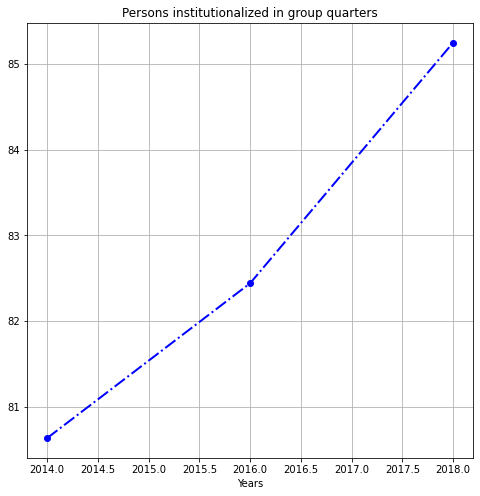

In [297]:
year_data = np.array([2014, 2016, 2018])
groupqtrs_data = np.array([transp_htype2014_df['E_GROUPQ'].mean(),transp_htype2016_df['E_GROUPQ'].mean(),transp_htype2018_df['E_GROUPQ'].mean()])

plt.figure(figsize = (8,8))
plt.plot(year_data, groupqtrs_data, 'bo', lw = 2., ls = '-.')
plt.xlabel('Years')
plt.title('Persons institutionalized in group quarters')
plt.grid(True)

## V. Model

In [298]:
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [299]:
X = soc_econ2018_df [['E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP']]
y = soc_econ2018_df ['RPL_THEME1']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [300]:
#this code works, but some code below when I call it returns and error, did not use it until I verify it against regression data docs

#lookup_rpl_theme1 = dict(zip(soc_econ2018_df.FIPS.unique(), soc_econ2018_df.RPL_THEME1.unique()))
#lookup_rpl_theme1

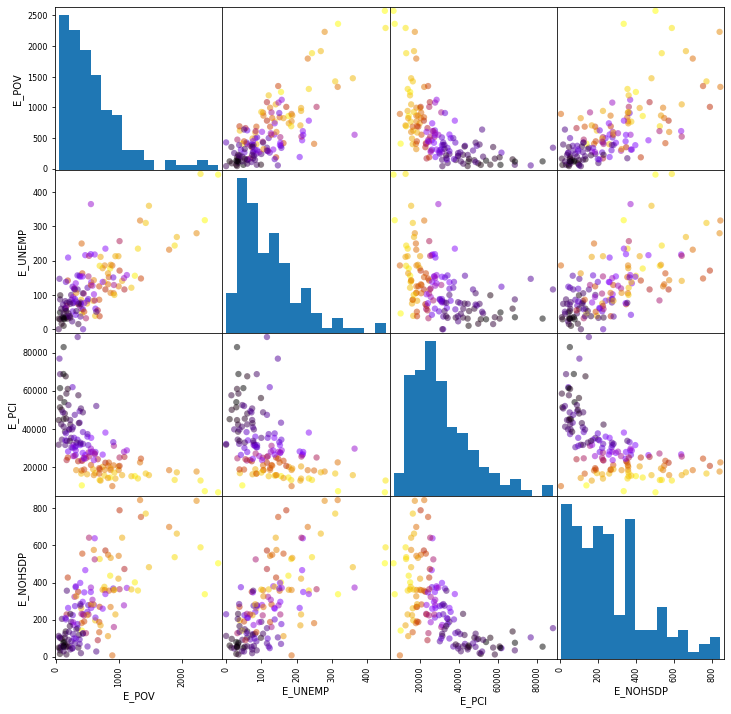

In [301]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker ='o', s = 40, hist_kwds = {'bins':15}, figsize = (12, 12), cmap = cmap)

In [302]:
import pandas as pd
knn = KNeighborsRegressor(n_neighbors = 5)

In [303]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [304]:
import pandas as pd

In [305]:
knn.score(X_test, y_test)

0.8693644598259345

In [306]:
rpl_theme1_prediction = knn.predict([[303,51,15089,235]])
rpl_theme1_prediction
#lookup_rpl_theme1(rpl_theme1_prediction[0]) #might not work here because my data is regression not classification

array([0.9155])

In [307]:
rpl_theme1_prediction = knn.predict([[400,51,39000,235]])
rpl_theme1_prediction

array([0.08194])

In [308]:
X = hcompo_disabl2018_df [['E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT']]
y = hcompo_disabl2018_df ['RPL_THEME2']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

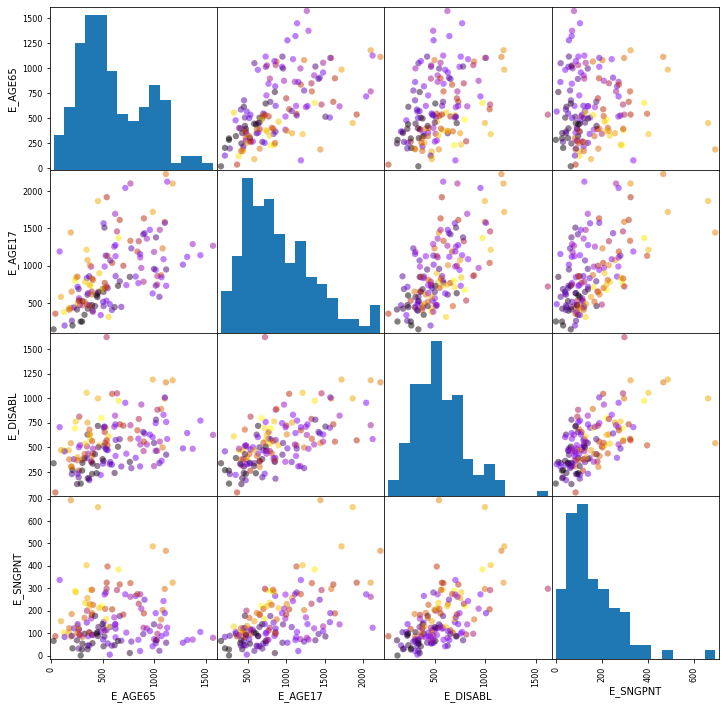

In [309]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker ='o', s = 40, hist_kwds = {'bins':15}, figsize = (12, 12), cmap = cmap)

In [310]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [311]:
knn.score(X_test, y_test)

0.5446042877140369

In [312]:
rpl_theme2_prediction = knn.predict([[303,51,15089,235]])
rpl_theme2_prediction

array([0.70524])

In [313]:
rpl_theme2_prediction = knn.predict([[400,51,39000,235]])
rpl_theme2_prediction

array([0.747])

In [314]:
X = minrty_lang2018_df [['E_MINRTY', 'E_LIMENG']]
y = minrty_lang2018_df ['RPL_THEME3']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

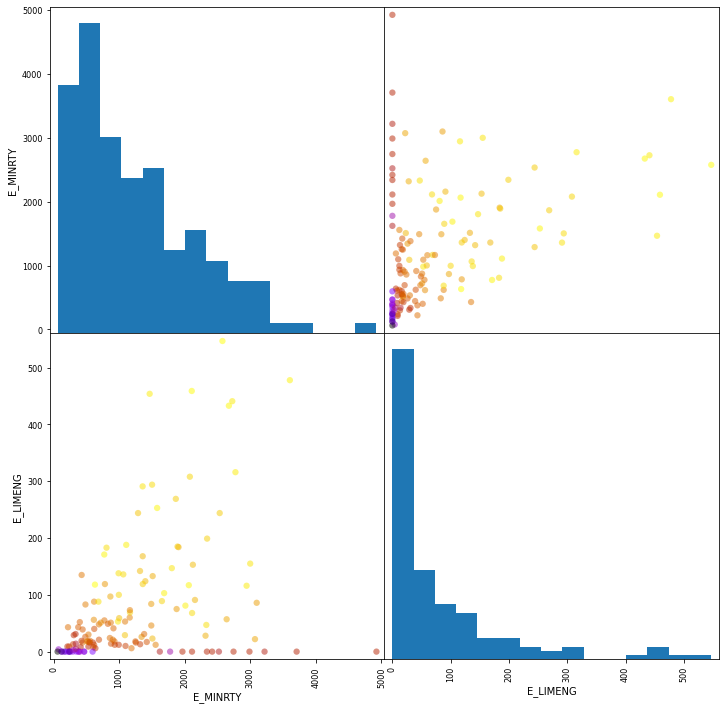

In [315]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker ='o', s = 40, hist_kwds = {'bins':15}, figsize = (12, 12), cmap = cmap)

In [316]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [317]:
knn.score(X_test, y_test)

0.39935316570321944

In [318]:
rpl_theme3_prediction = knn.predict([[303,51]])
rpl_theme3_prediction

array([0.54296])

In [319]:
rpl_theme3_prediction = knn.predict([[400,51]])
rpl_theme3_prediction

array([0.68936])

In [320]:
X = transp_htype2018_df [['E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']]
y = transp_htype2018_df ['RPL_THEME4']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

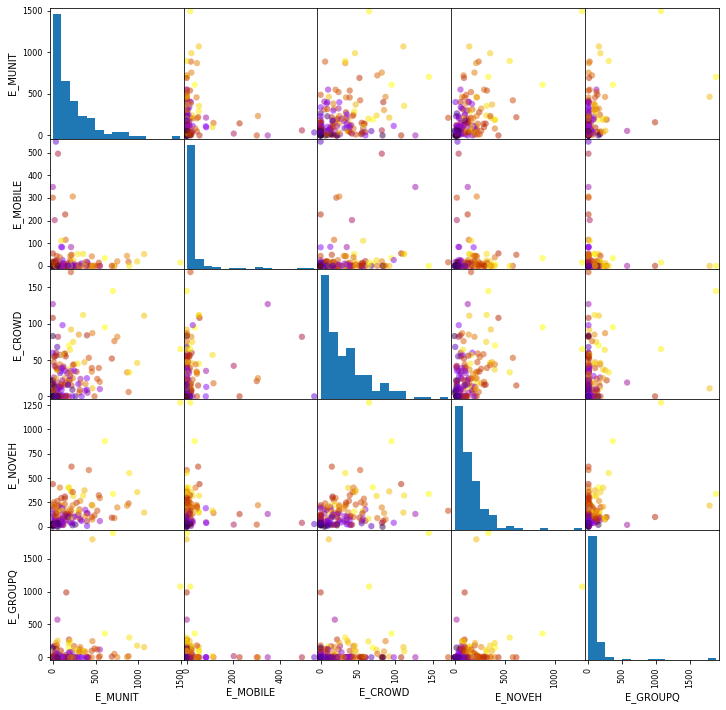

In [321]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker ='o', s = 40, hist_kwds = {'bins':15}, figsize = (12, 12), cmap = cmap)

In [322]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [323]:
knn.score(X_test, y_test)

0.7077094248518098

In [324]:
rpl_theme4_prediction = knn.predict([[303,51,15089,235,15]])
rpl_theme4_prediction

array([0.54948])

In [325]:
rpl_theme4_prediction = knn.predict([[400,51,39000,235,20]])
rpl_theme4_prediction

array([0.66958])

In [326]:
overall_vulner2018_df = jeff2018_df[['E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP','E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT','E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']] 
X = overall_vulner2018_df
y = jeff2018_df['RPL_THEMES']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [327]:
overall_vulner2018_df.head()

,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
14,164,35,58449.0,12,285,253,132,0,122,0,92,0,0,60,0
16,88,16,49948.0,96,568,485,330,4,62,0,0,15,0,31,0
21,62,29,51271.0,15,368,471,167,45,77,4,0,4,0,15,0
26,63,49,61334.0,47,999,1185,310,73,414,8,0,0,0,17,0
30,97,38,49473.0,41,624,422,270,80,68,0,89,0,5,36,0


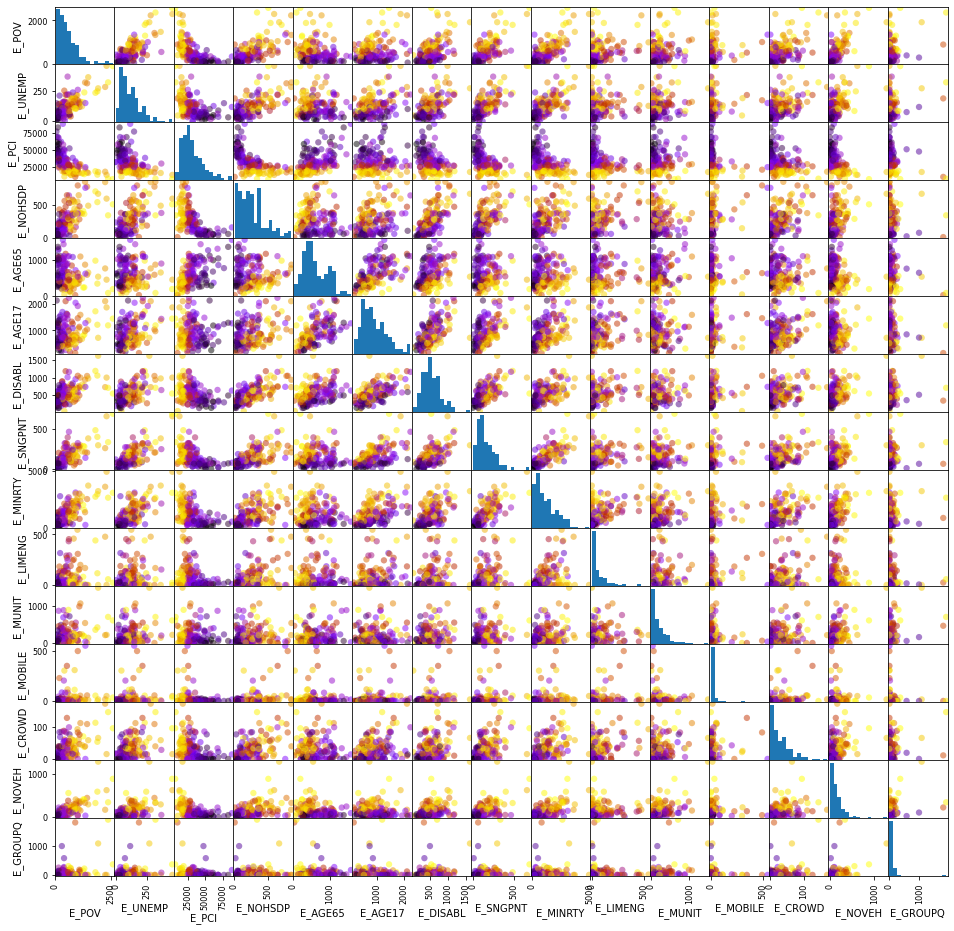

In [328]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker ='o', s = 40, hist_kwds = {'bins':15}, figsize = (16, 16), cmap = cmap)

In [329]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [330]:
knn.score(X_test, y_test)

0.8404901315184258

In [331]:
rpl_themes_prediction = knn.predict([[303,51,15089,235,25,196,312,329,96,0,0,139,10,9,0]])
rpl_themes_prediction

array([0.94632])

Click here to view 2018 Jefferson County, KY CDC SVI maps
[Map-CDC Social Vulnerability Index 2018 PART 1
Jefferson County, Kentucky](https://svi.cdc.gov/Documents/CountyMaps/2018/Kentucky/Kentucky2018_Jefferson.pdf)

To view other counties in KY-Jefferson click [here](https://svi.cdc.gov/prepared-county-maps.html)

![svimap](https://www.atsdr.cdc.gov/placeandhealth/svi/img/svimap.png)

## VI. Conclusion

In [332]:
martin2018_df = ky2018_df[ky2018_df['FIPS']==21159950100]
martin2018_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
884,21,KENTUCKY,KY,21159,Martin,21159950100,"Census Tract 9501, Martin County, Kentucky",36.306123,3723,528,1834,147,1395,166,1002,261,217,118,16837,2344,635,222,414,92,866,180,902,250,156,99,75,742,0,44,0,15,868,175,38,62,193,133,15,8,27.2,6.5,14.5,7.5,16837.0,2344.0,26.1,7.6,11.1,2.7,23.3,3.5,24.2,6.1,11.2,7.0,2.0,19.9,0.0,1.3,0.0,0.9,47.3,8.6,2.7,4.4,13.8,9.1,0.4,0.2,0.7604,0.9304,0.8609,0.8698,3.4215,0.9238,0.1516,0.5659,0.8092,0.731,2.2577,0.6582,0.1128,0.0,0.1128,0.0939,0.0,0.9864,0.7103,0.8424,0.5731,3.1122,0.8288,8.9042,0.7915,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,98,66,2.6,1.7,3188


In [333]:
oldhamco2018_df = ky2018_df[ky2018_df['FIPS']==21185030801]
oldhamco2018_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
18,21,KENTUCKY,KY,21185,Oldham,21185030801,"Census Tract 308.01, Oldham County, Kentucky",5.38136,4589,259,1485,59,1409,71,86,59,58,38,64071,6569,54,51,420,56,1563,133,154,63,64,38,548,348,0,44,29,32,0,11,0,15,1,3,0,11,1.9,1.3,2.6,1.7,64071.0,6569.0,2.0,1.9,9.2,1.3,34.1,2.2,3.4,1.3,4.5,2.7,11.9,7.6,0.0,1.0,2.0,2.2,0.0,2.0,0.0,1.1,0.1,0.2,0.0,0.2,0.0154,0.1238,0.0117,0.0316,0.1825,0.0109,0.0767,0.9901,0.0,0.1913,1.2581,0.104,0.6056,0.0,0.6056,0.3782,0.5009,0.0,0.0,0.0208,0.0,0.5217,0.0181,2.5679,0.0063,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,20,19,0.4,0.4,1816


In [334]:
anchorage2018_df = ky2018_df[ky2018_df['FIPS']==21111010403]
anchorage2018_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
265,21,KENTUCKY,KY,21111,Jefferson,21111010403,"Census Tract 104.03, Jefferson County, Kentucky",4.328846,3925,230,1736,60,1618,86,251,124,52,30,57759,6561,101,54,1022,99,775,64,455,96,47,26,724,308,4,41,158,70,10,15,11,19,50,30,151,50,6.7,3.2,2.8,1.7,57759.0,6561.0,3.5,1.9,26.0,2.4,19.7,1.2,12.1,2.5,2.9,1.7,18.4,7.8,0.1,1.1,9.1,4.1,0.6,0.9,0.7,1.2,3.1,1.9,3.8,1.3,0.1392,0.1418,0.0181,0.0868,0.3859,0.0499,0.9838,0.2301,0.1944,0.0668,1.4751,0.1835,0.7265,0.454,1.1805,0.6435,0.7951,0.2636,0.2897,0.2482,0.8457,2.4423,0.5734,5.4838,0.2303,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,52,48,1.4,1.3,2220


In [335]:
west9_2018_df = ky2018_df[ky2018_df['FIPS']==21111002700]
west9_2018_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
1114,21,KENTUCKY,KY,21111,Jefferson,21111002700,"Census Tract 27, Jefferson County, Kentucky",1.39704,2403,374,1511,112,937,124,1252,373,156,85,15178,4936,401,141,230,57,799,199,693,155,289,106,2011,406,81,125,189,95,7,12,70,53,405,113,148,108,53.9,12.8,16.3,8.4,15178.0,4936.0,26.7,8.3,9.6,2.6,33.3,6.5,29.8,6.2,30.8,10.6,83.7,10.8,3.5,5.4,12.5,6.3,0.5,0.8,7.5,5.6,43.2,11.7,6.2,4.4,0.9882,0.9476,0.9214,0.8861,3.7433,0.9801,0.0848,0.9856,0.9313,0.9964,2.9981,0.9756,0.9847,0.9224,1.9071,0.9792,0.8493,0.2455,0.9856,0.9937,0.9097,3.9838,0.9937,12.6323,1.0,1,1,1,0,3,0,1,1,1,3,1,1,2,0,0,1,1,1,3,11,165,136,7.1,5.6,6979
